In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [3]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Collection And Preprocessing

In [5]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
df.shape

(10000, 12)

In [7]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [9]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [11]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [14]:
df['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [15]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [16]:
data= df.copy()

In [17]:
data = data.drop('customer_id',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Exploratory data analysis and visualization


In [19]:
#analysis the corelation


In [20]:
df['country']

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: country, Length: 10000, dtype: object

In [21]:
def country (name):
    if name == 'France':
        return 0
    elif name =='Germany':
        return 1
    else:
        return 2

In [22]:
df['country'] = df['country'].apply(country)

In [23]:
def gender(g):
    if g == 'Male':
        return 0
    else:
        return 1

In [24]:
df['gender'] = df['gender'].apply(gender)

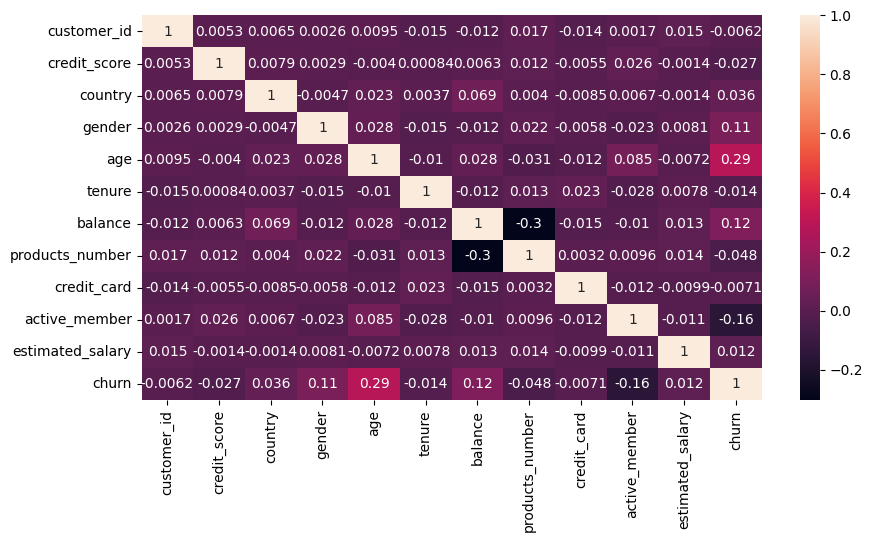

In [25]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [26]:
abs(df.corr()['churn']).sort_values(ascending=False)


churn               1.000000
age                 0.285323
active_member       0.156128
balance             0.118533
gender              0.106512
products_number     0.047820
country             0.035943
credit_score        0.027094
tenure              0.014001
estimated_salary    0.012097
credit_card         0.007138
customer_id         0.006248
Name: churn, dtype: float64

<Axes: xlabel='churn', ylabel='count'>

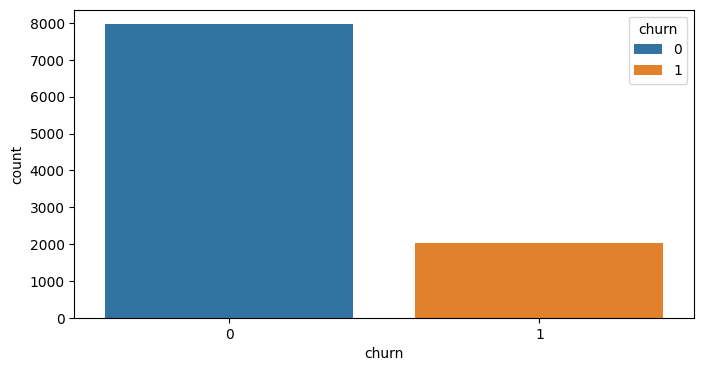

In [27]:

plt.figure(figsize=(8,4))
sns.countplot(data=df,x= 'churn',hue= 'churn')

<Axes: xlabel='country', ylabel='count'>

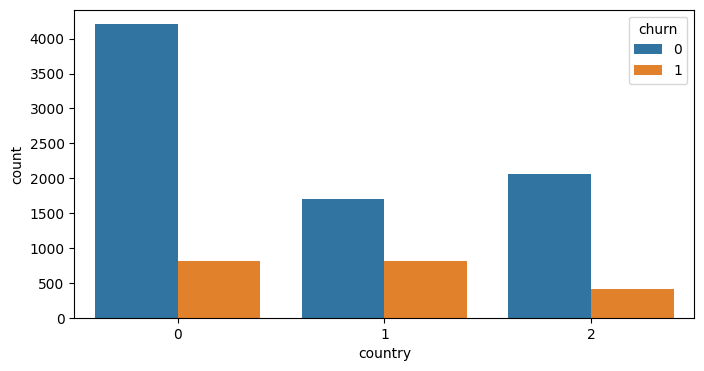

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x= 'country',hue= 'churn')

<Axes: xlabel='gender', ylabel='count'>

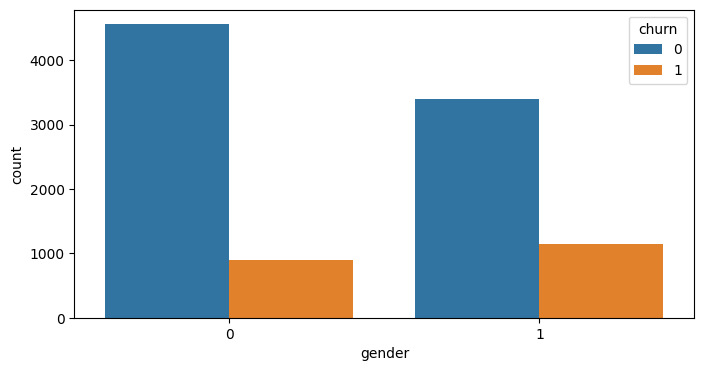

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x= 'gender',hue= 'churn')

<Axes: xlabel='active_member', ylabel='count'>

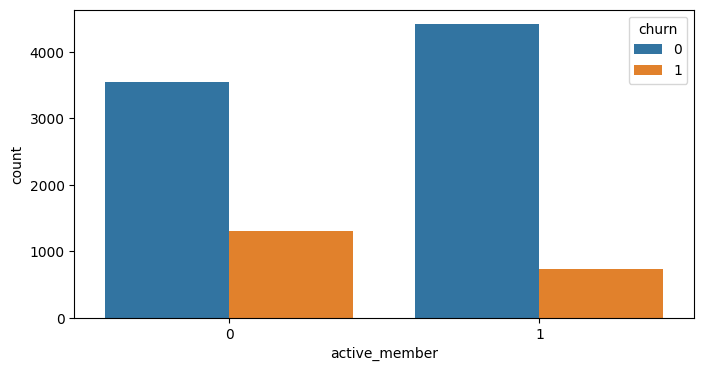

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x= 'active_member',hue= 'churn')

<Axes: xlabel='credit_card', ylabel='count'>

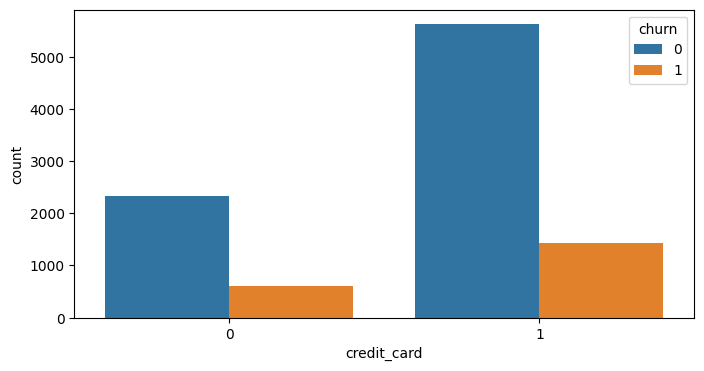

In [31]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x= 'credit_card',hue= 'churn')

In [32]:
#  Germany has highest number of churners
#  Female churners > Male churners
#  Most churners are not active members


<Axes: xlabel='products_number', ylabel='count'>

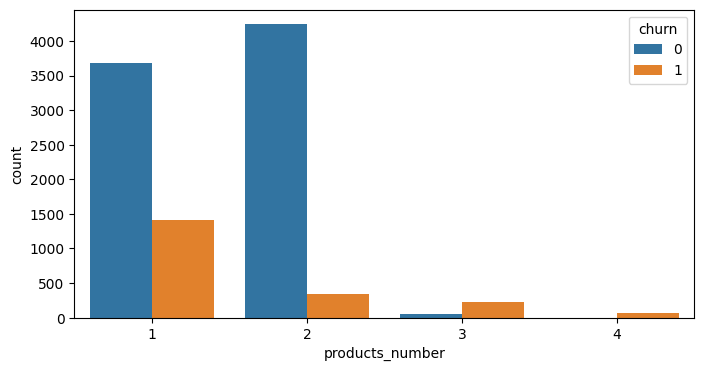

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x= 'products_number',hue= 'churn')

In [34]:
# Most customers have only 1 or 2 products
# Most of the non-churners have 2 products
# Most of the churners have 1 product
# Customers having 3,4 products are mostly churners



In [35]:
#analyzing data using histplot


<Axes: xlabel='credit_score', ylabel='Count'>

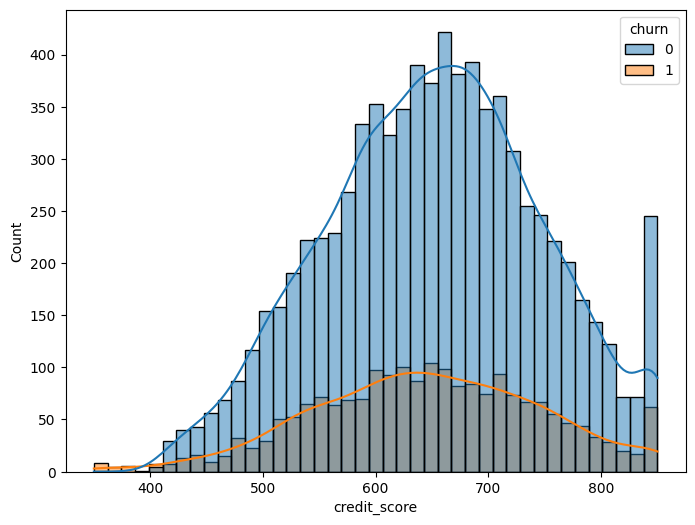

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='credit_score',hue='churn', kde=True)

<Axes: xlabel='age', ylabel='Count'>

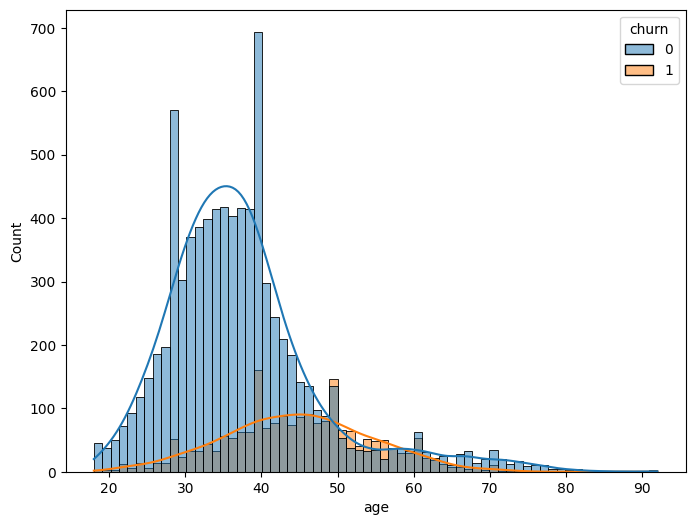

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age',hue='churn', kde=True)

<Axes: xlabel='estimated_salary', ylabel='Count'>

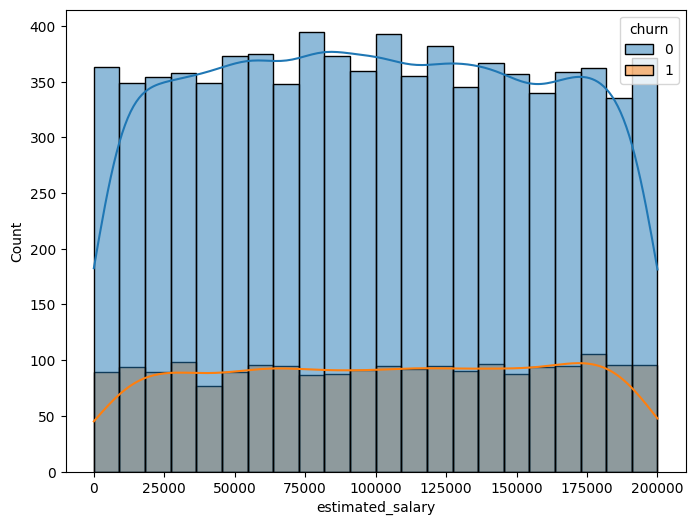

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='estimated_salary',hue='churn', kde=True)

<Axes: xlabel='balance', ylabel='Count'>

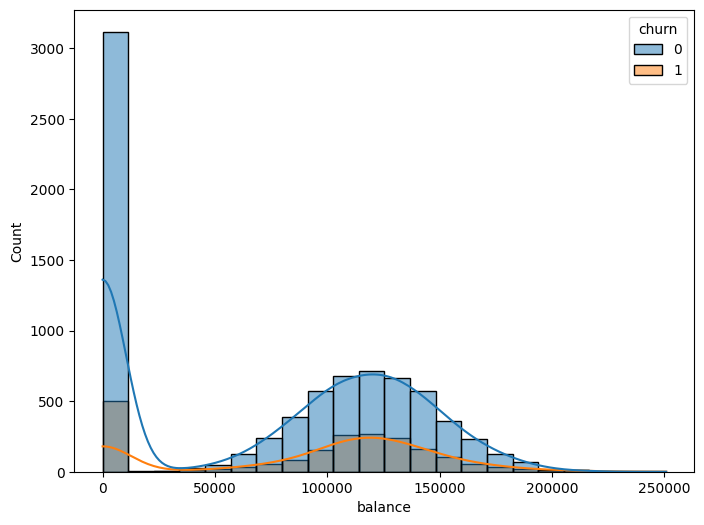

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='balance',hue='churn', kde=True)

In [40]:
#analyzing using scatterplot


<Axes: xlabel='age', ylabel='estimated_salary'>

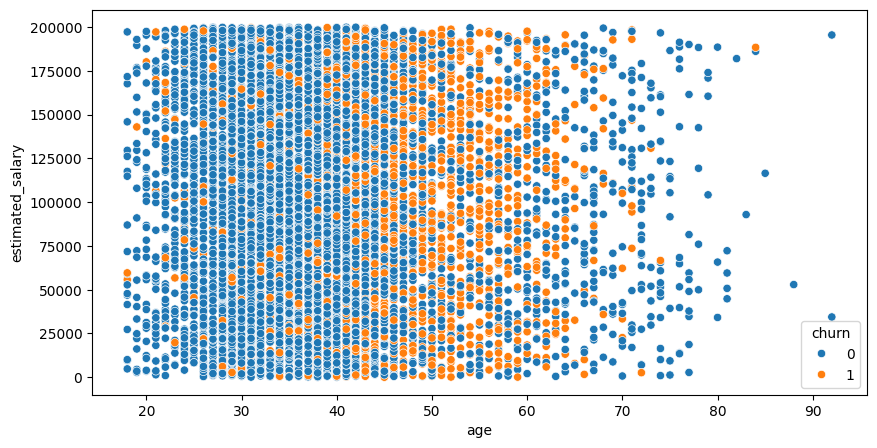

In [41]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='age',y='estimated_salary',hue='churn')

In [42]:
# Most churners are within the age group of 50-60 years


<Axes: xlabel='estimated_salary', ylabel='credit_score'>

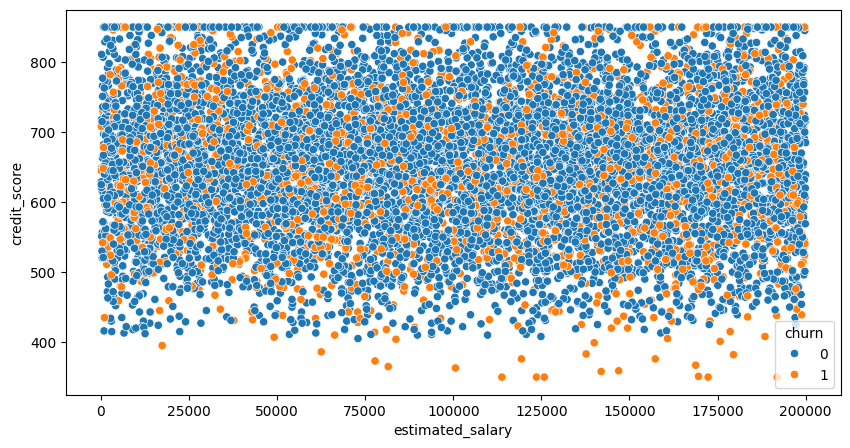

In [43]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='estimated_salary',y='credit_score',hue='churn')

In [44]:
# Customers with credit score < 400 are mostly churners


# data processing

In [45]:
df = pd.get_dummies(df, columns = ['country', 'gender'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
 10  country_0         10000 non-null  bool   
 11  country_1         10000 non-null  bool   
 12  country_2         10000 non-null  bool   
 13  gender_0          10000 non-null  bool   
 14  gender_1          10000 non-null  bool   
dtypes: bool(5), float64(2), int64(8)
memory usage: 830.2 KB


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X=df.drop('churn',axis=1)
Y=df['churn']

In [49]:
X.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_0,country_1,country_2,gender_0,gender_1
0,15634602,619,42,2,0.00,1,1,1,101348.88,True,False,False,False,True
1,15647311,608,41,1,83807.86,1,0,1,112542.58,False,False,True,False,True
2,15619304,502,42,8,159660.80,3,1,0,113931.57,True,False,False,False,True
3,15701354,699,39,1,0.00,2,0,0,93826.63,True,False,False,False,True
4,15737888,850,43,2,125510.82,1,1,1,79084.10,False,False,True,False,True


In [50]:

Y.head()


0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [52]:
X_train.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_0,country_1,country_2,gender_0,gender_1
9254,15601116,686,32,6,0.00,2,1,1,179093.26,True,False,False,True,False
1561,15766374,632,42,4,119624.60,2,1,1,195978.86,False,True,False,True,False
1670,15716994,559,24,3,114739.92,1,1,0,85891.02,False,False,True,True,False
6087,15730759,561,27,9,135637.00,1,1,0,153080.40,True,False,False,False,True
6669,15797900,517,56,9,142147.32,1,0,0,39488.04,True,False,False,True,False


In [53]:
y_train.head()

9254    0
1561    0
1670    1
6087    1
6669    1
Name: churn, dtype: int64

# model building

In [54]:
# LOGISTIC REGRESSION




In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report


In [56]:
model=LogisticRegression()

In [57]:
model.fit(X_train,y_train)

LogisticRegression()

In [58]:
ypred=model.predict(X_test)
accuracy = accuracy_score(y_test, ypred)
report = classification_report(y_test, ypred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,ypred))

Accuracy: 0.8035
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



C:\Users\balac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\balac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\balac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\balac\anaconda3\lib\site-packages\sklearn\metr

In [59]:
# DECISION TREE CLASSIFIER





In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dc_model=DecisionTreeClassifier()

In [62]:
dc_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
ypred=dc_model.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, ypred)
report = classification_report(y_test, ypred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,ypred))

Accuracy: 0.783
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1607
           1       0.46      0.54      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.78      0.79      2000



In [65]:
# RANDOM FOREST CLASSIFIER





In [66]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model=RandomForestClassifier()

In [ ]:
rf_model.fit(X_train,y_train)

In [ ]:
ypred=rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, ypred)
report = classification_report(y_test, ypred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,ypred))

In [67]:
# SUPPORT VECTOR CLASSIFIER





In [68]:
from sklearn.svm import SVC

In [69]:
sv_model=SVC()

In [70]:
sv_model.fit(X_train,y_train)

SVC()

In [ ]:
ypred=sv_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, ypred)
report = classification_report(y_test, ypred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,ypred))

In [ ]:
# K NEIGHBORS CLASSIFIER





In [73]:
 from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [75]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
ypred=knn_model.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, ypred)
report = classification_report(y_test, ypred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,ypred))

Accuracy: 0.736
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1607
           1       0.22      0.14      0.17       393

    accuracy                           0.74      2000
   macro avg       0.52      0.51      0.51      2000
weighted avg       0.69      0.74      0.71      2000



In [78]:
# k-Means clustering

In [82]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [83]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [84]:
# Generate synthetic data
np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

In [85]:
# Apply k-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

C:\Users\balac\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [86]:
# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

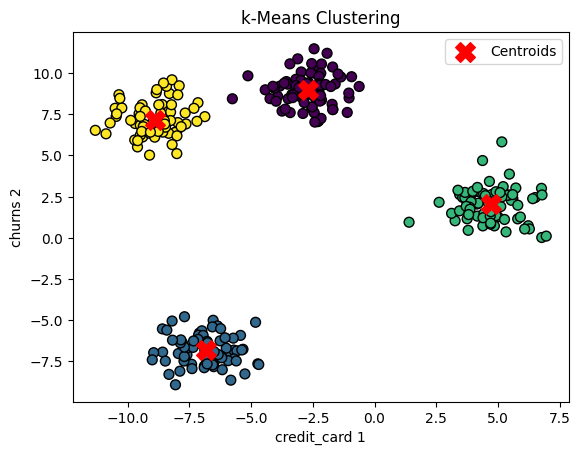

In [87]:
# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('k-Means Clustering')
plt.xlabel('credit_card 1')
plt.ylabel('churn 2')
plt.legend()
plt.show()